In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('black_friday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
# Product_Category 2 and Product_Category 3 have more null values almost 60% of the data will be lost if we delete the rows
# null values so that if we delete only the columns then we may loose only 10 to 20% of data
del df["Product_Category_2"]
del df["Product_Category_3"]

In [10]:
df['User_ID'].nunique()

5891

In [11]:
df["Product_ID"].nunique()

3623

In [12]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [13]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df["Occupation"].nunique()

21

In [15]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [16]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [19]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [20]:
df["Purchase"].sum()/len(df['Purchase'])

9333.859852635065

In [21]:
 df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [22]:
for column in df.columns:
    data = df[column].unique()
    if len(data) > 10:
        data = ""
    else:
        data = "The unique data points are : " + str(data) + " : "
    print(column + " : " + str(data)  + str(df[column].nunique()) )

User_ID : 5891
Product_ID : 3623
Gender : The unique data points are : ['F' 'M'] : 2
Age : The unique data points are : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] : 7
Occupation : 21
City_Category : The unique data points are : ['A' 'C' 'B'] : 3
Stay_In_Current_City_Years : The unique data points are : ['2' '4+' '3' '1' '0'] : 5
Marital_Status : The unique data points are : [0 1] : 2
Product_Category_1 : 18
Purchase : 17959


In [23]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [24]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [25]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == "M"]), len(df[df["Gender"] == "F"])]}, index = ['Male', 'Female'])

<AxesSubplot:ylabel='Ratio'>

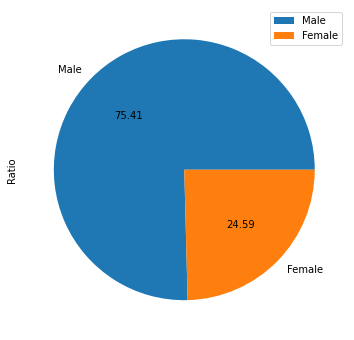

In [26]:
data.plot.pie(y = "Ratio", figsize = (6,6), autopct = "%.2f")

<AxesSubplot:title={'center':'Gender Ratio'}>

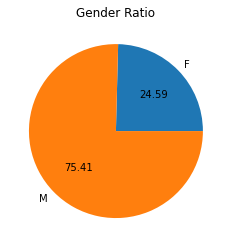

In [27]:
df.groupby('Gender').size().plot(ylabel = "", title = "Gender Ratio", kind = "pie", autopct = "%.2f")

<AxesSubplot:title={'center':'Gender Ratio'}, xlabel='Gender'>

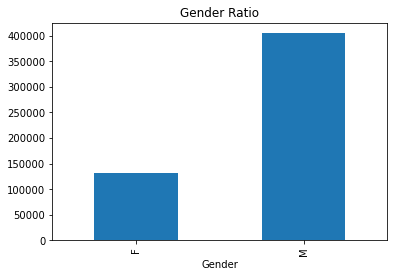

In [28]:
df.groupby('Gender').size().plot(ylabel = "", title = "Gender Ratio", kind = "bar")

In [29]:
df.groupby('Gender').sum()["Purchase"]

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<AxesSubplot:title={'center':'Purchase Grouped by Gender'}, ylabel='Purchase'>

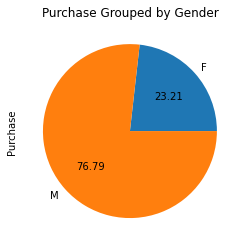

In [30]:
df.groupby('Gender').sum()["Purchase"].plot(title = "Purchase Grouped by Gender", kind = "pie", autopct = "%.2f")

<AxesSubplot:title={'center':'Average Purchase per product Grouped by Gender'}, ylabel='Purchase'>

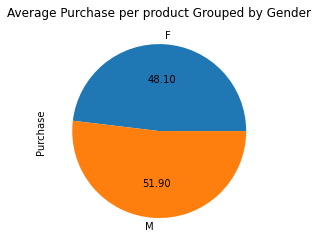

In [31]:
df.groupby('Gender').mean()["Purchase"].plot(title = "Average Purchase per product Grouped by Gender", kind = "pie", autopct = "%.2f")

<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

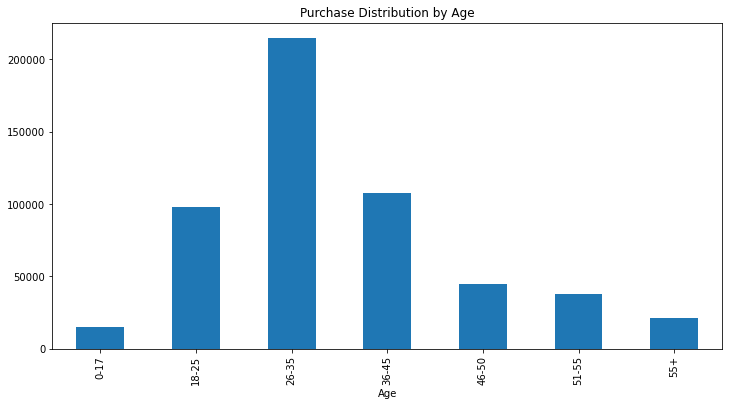

In [32]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = "Purchase Distribution by Age")

In [33]:
data = df.groupby('Age')["Product_ID"].nunique().to_frame()
data["Age"] = data.index
data.drop('Age', axis = 1, inplace = True)
data.reset_index(level = 0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Age,Product_ID
0,0-17,2300
1,18-25,3213
2,26-35,3419
3,36-45,3318
4,46-50,3099
5,51-55,2877
6,55+,2573


<AxesSubplot:xlabel='Age'>

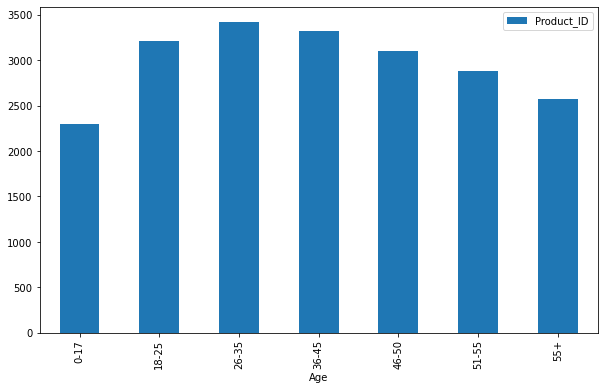

In [34]:
data.plot.bar(x = "Age", figsize = (10,6))

<AxesSubplot:title={'center':'Amount spent by Age'}, xlabel='Age'>

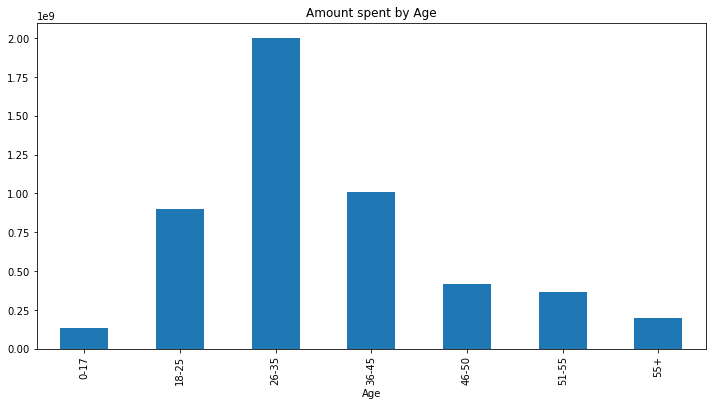

In [35]:
df.groupby('Age').sum()["Purchase"].plot(kind = 'bar', figsize = (12,6), title = "Amount spent by Age")

In [36]:
df.groupby('Age').mean()["Purchase"]

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<AxesSubplot:title={'center':'Amount spent by Age'}, xlabel='Age'>

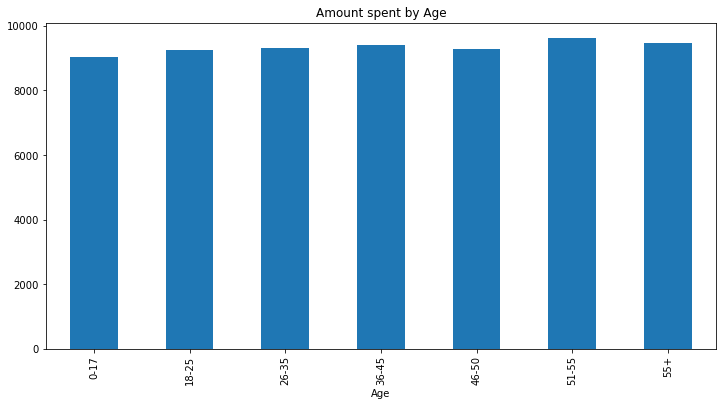

In [37]:
df.groupby('Age').mean()["Purchase"].plot(kind = 'bar', figsize = (12,6), title = "Amount spent by Age")

<AxesSubplot:title={'center':'Amount spent by Age'}, ylabel='Purchase'>

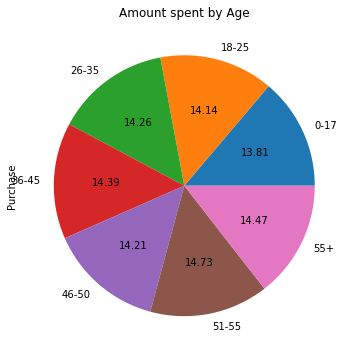

In [38]:
df.groupby('Age').mean()["Purchase"].plot(kind = 'pie', figsize = (12,6), title = "Amount spent by Age", autopct = '%.2f')

<AxesSubplot:title={'center':'Marital Status'}>

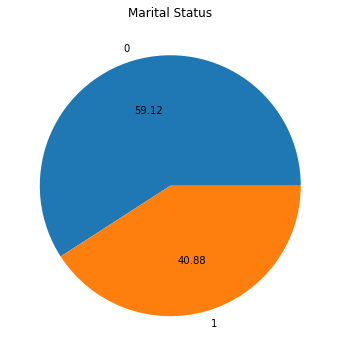

In [39]:
df.groupby('Marital_Status').size().plot(ylabel = "", kind = 'pie', figsize = (12,6), title = "Marital Status", autopct = '%.2f')

<AxesSubplot:title={'center':'Gender'}>

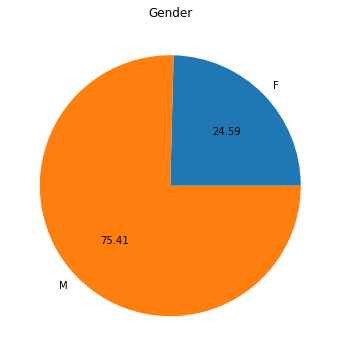

In [40]:
df.groupby('Gender').size().plot(ylabel = "", kind = 'pie', figsize = (12,6), title = "Gender", autopct = '%.2f')

### Multicolumn Analysis.

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:xlabel='Age', ylabel='count'>

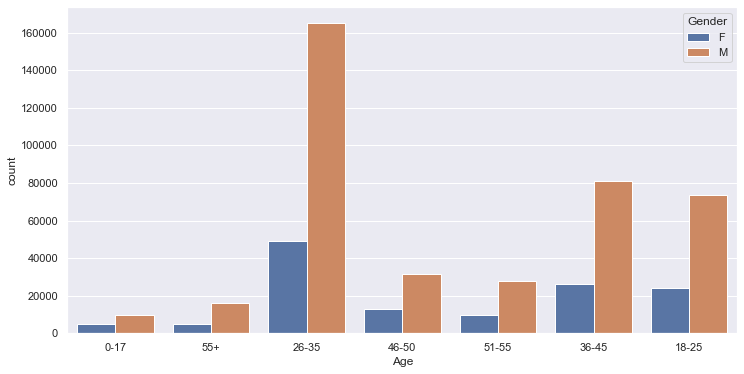

In [42]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = "Gender", data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

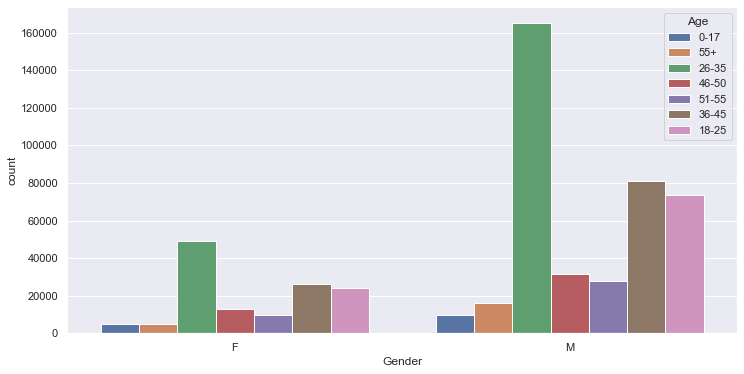

In [43]:
sns.countplot(x = "Gender", hue = "Age", data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

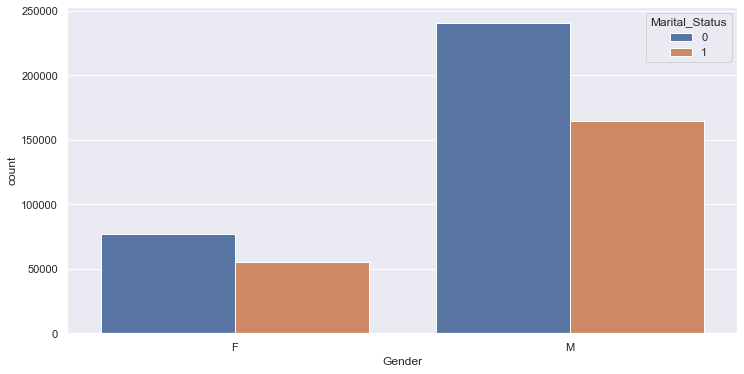

In [44]:
sns.countplot(x = "Gender", hue = "Marital_Status", data = df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

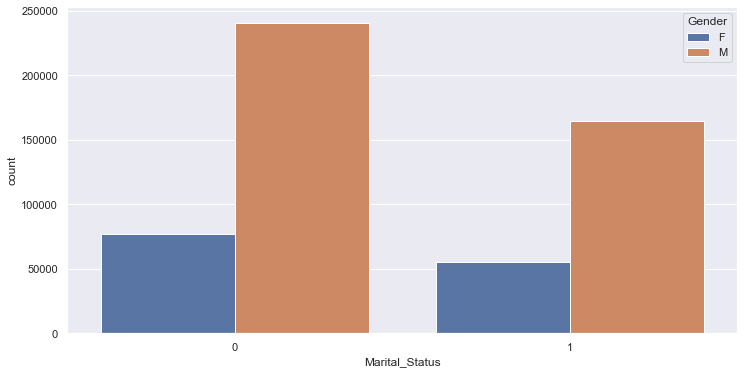

In [45]:
sns.countplot(x = "Marital_Status", hue = "Gender", data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

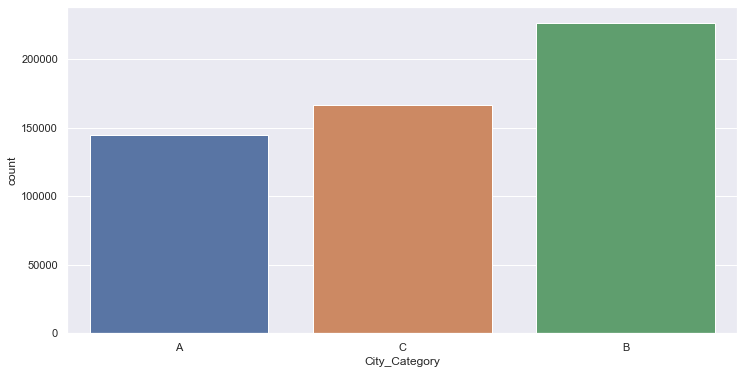

In [46]:
sns.countplot(x = df["City_Category"])

<AxesSubplot:title={'center':'Total percentage users by city'}>

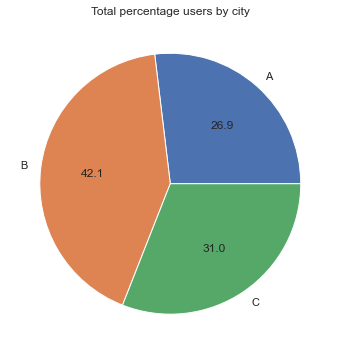

In [47]:
df.groupby("City_Category").size().plot(ylabel = "", kind = "pie", title = "Total percentage users by city", autopct = '%.1f')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

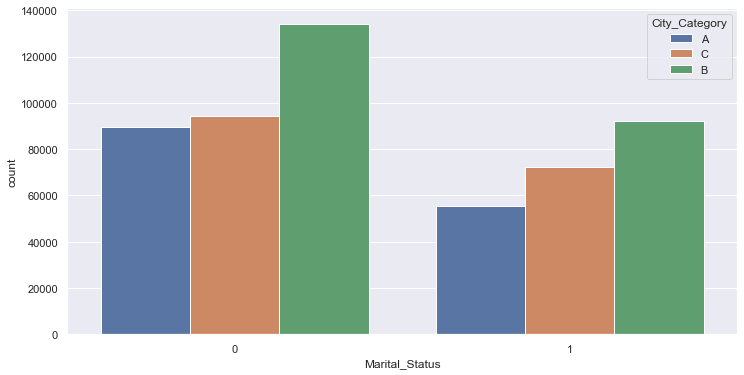

In [48]:
sns.countplot(x = "Marital_Status", hue = "City_Category", data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

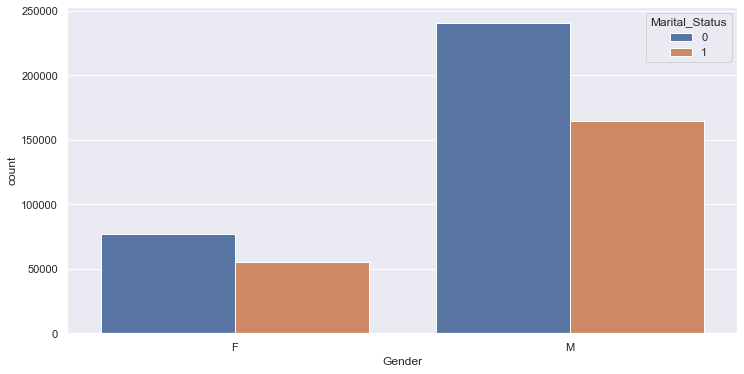

In [49]:
sns.countplot(x = "Gender", hue = "Marital_Status", data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

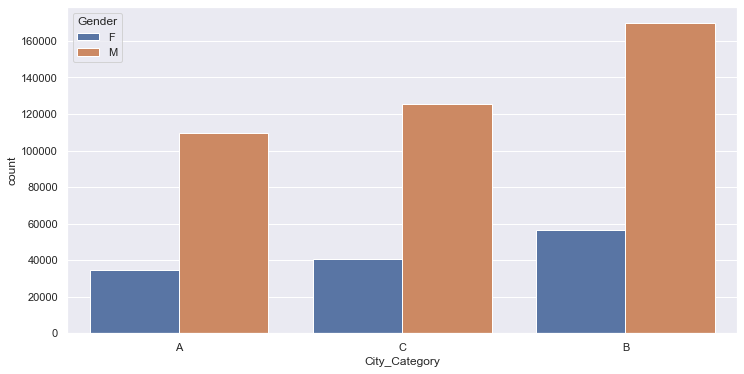

In [50]:
sns.countplot(x = "City_Category", hue = "Gender", data = df)

<AxesSubplot:ylabel='Purchase'>

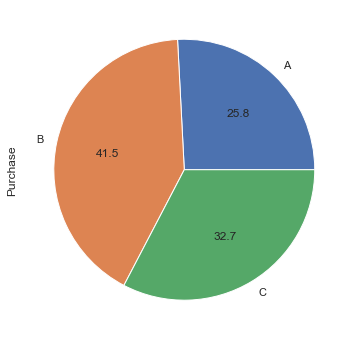

In [51]:
df.groupby("City_Category").sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:ylabel='Purchase'>

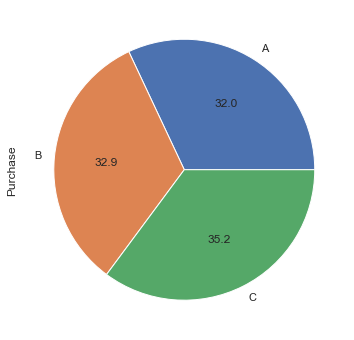

In [52]:
df.groupby("City_Category").mean()['Purchase'].plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:ylabel='None'>

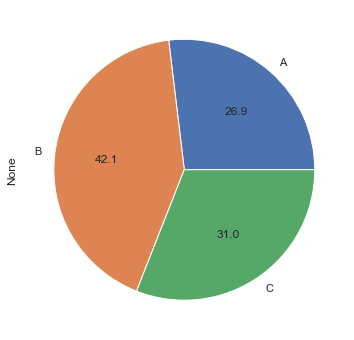

In [53]:
df.groupby("City_Category").size().plot(kind = 'pie', autopct = '%.1f')

### Occupation and Product Analysis

In [54]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

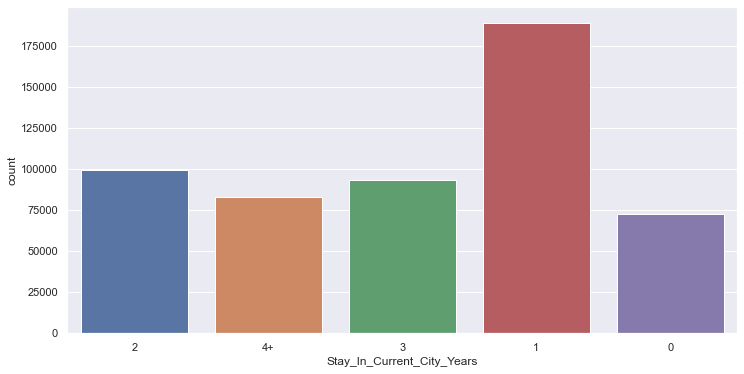

In [55]:
sns.countplot(x = df["Stay_In_Current_City_Years"])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

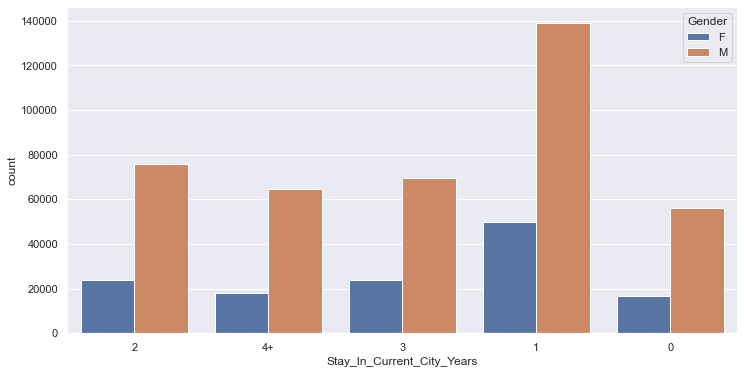

In [56]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Gender", data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

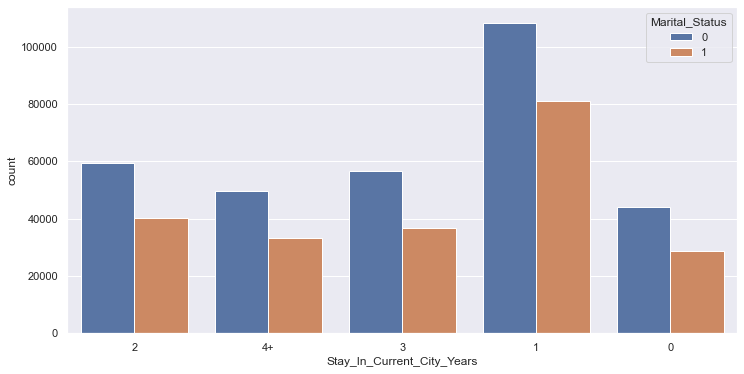

In [57]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Marital_Status", data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

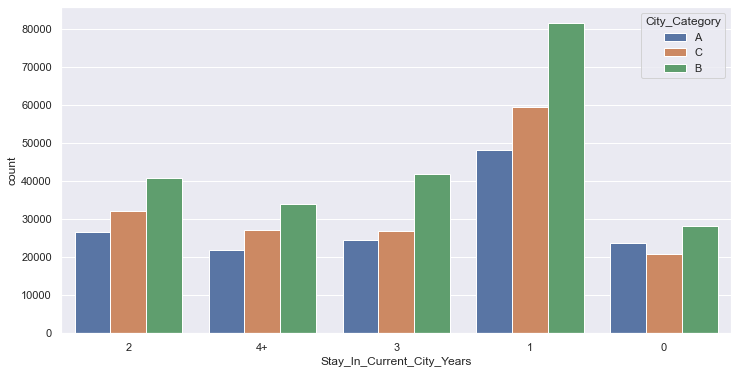

In [58]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "City_Category", data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

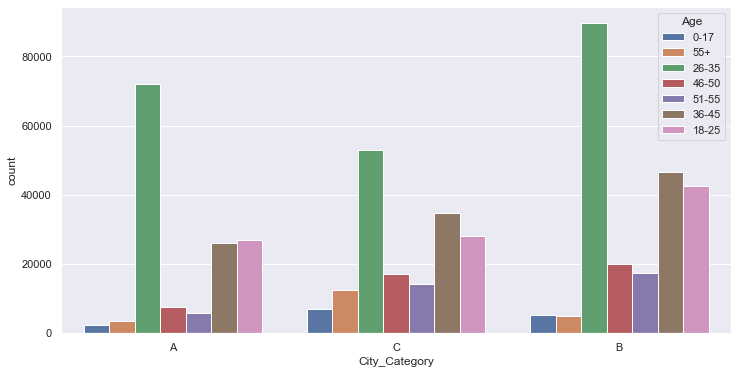

In [59]:
sns.countplot(x = "City_Category", hue = "Age", data = df)

<AxesSubplot:ylabel='None'>

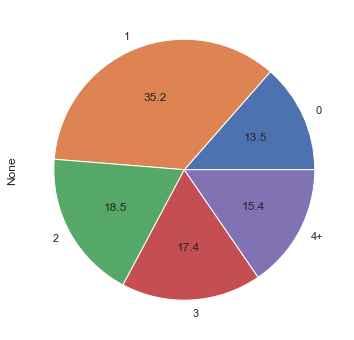

In [60]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:ylabel='Purchase'>

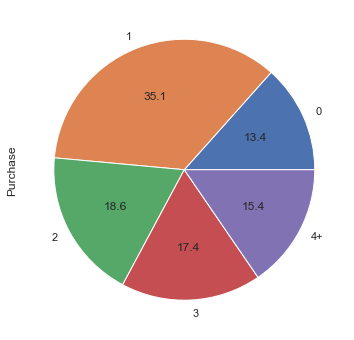

In [61]:
df.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:ylabel='Purchase'>

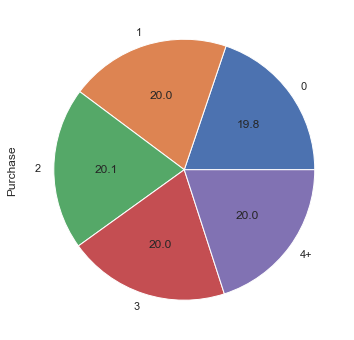

In [62]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind = 'pie', autopct = '%.1f')

In [63]:
unique_users_by_stay_in_current_city_years = []
print("Unique users by Stay_In_Current_City_Years")
for i in sorted(df["Stay_In_Current_City_Years"].unique()):
    total = df[df['Stay_In_Current_City_Years'] == i]['User_ID'].nunique()
    print(f"For {i} year stay : {total}")
    unique_users_by_stay_in_current_city_years.append(total)

Unique users by Stay_In_Current_City_Years
For 0 year stay : 772
For 1 year stay : 2086
For 2 year stay : 1145
For 3 year stay : 979
For 4+ year stay : 909


<AxesSubplot:xlabel='Occupation', ylabel='count'>

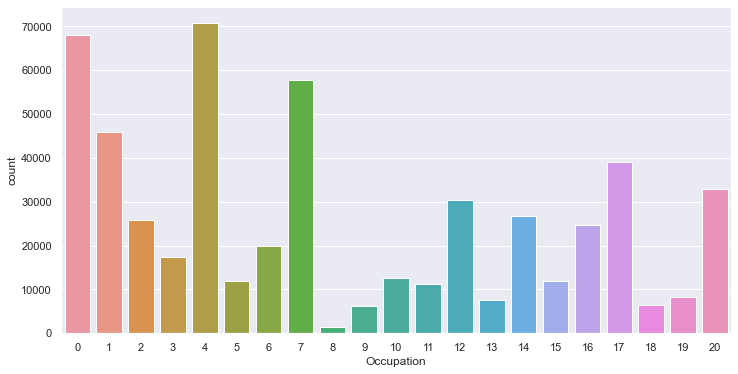

In [64]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

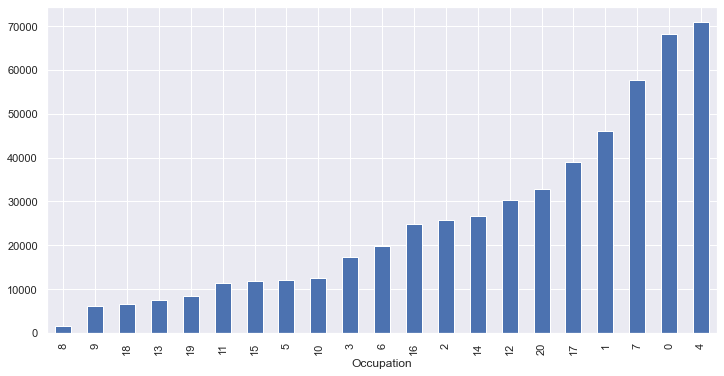

In [65]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

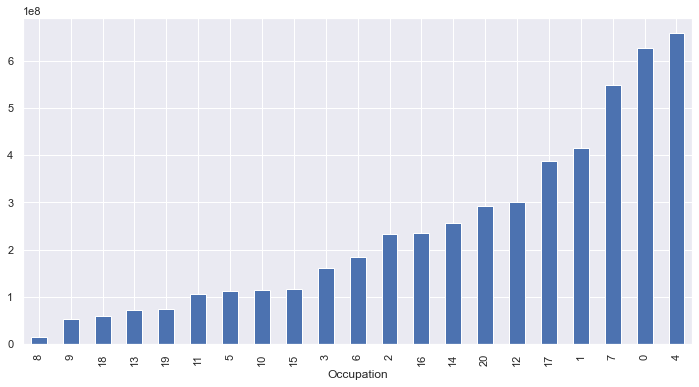

In [66]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

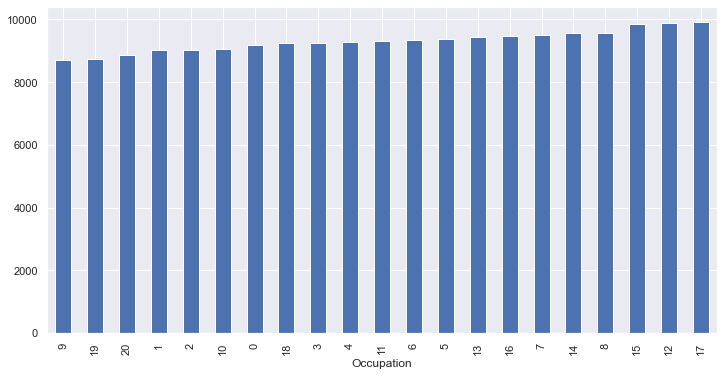

In [67]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

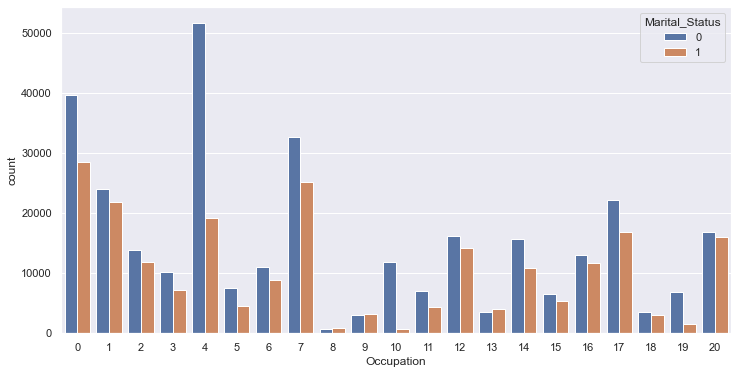

In [68]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

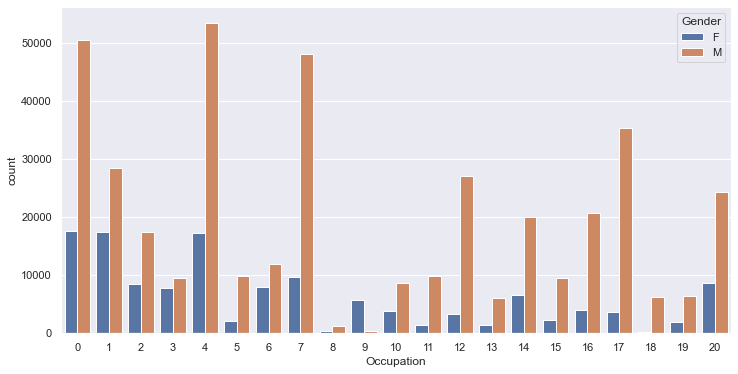

In [69]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Occupation'>

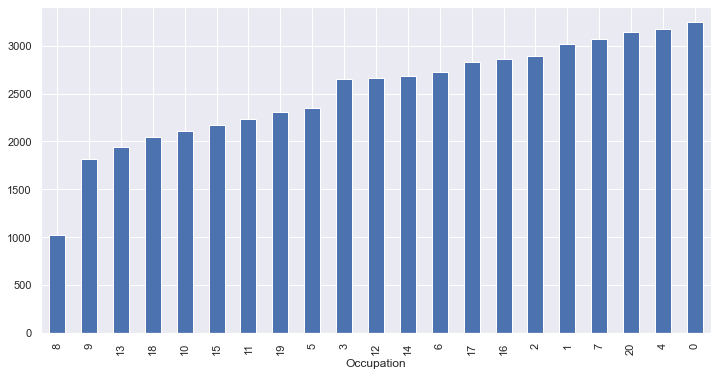

In [70]:
df.groupby('Occupation').nunique()["Product_ID"].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

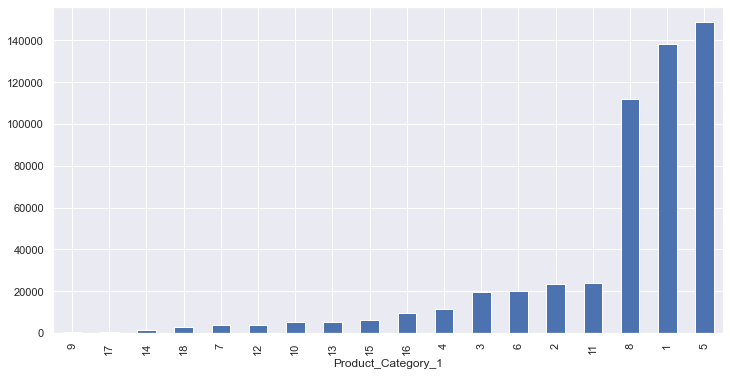

In [71]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

In [72]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:xlabel='Product_Category_1'>

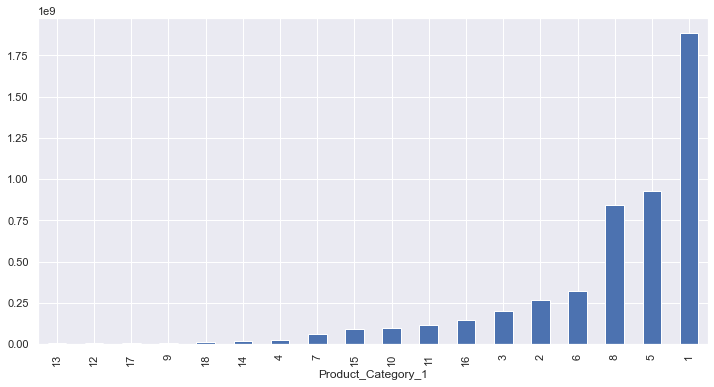

In [73]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

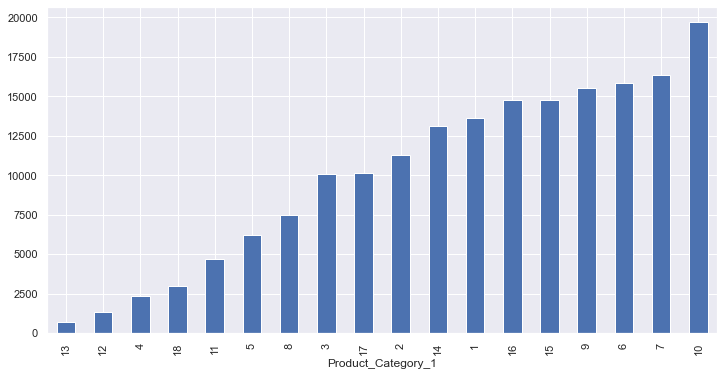

In [74]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

In [75]:
df.groupby('Product_Category_1').sum()

,User_ID,Occupation,Marital_Status,Purchase
Product_Category_1,,,,
1,138766965949,1144694,55123,1882666325
2,23569592048,194959,9553,264497242
3,19907401743,156392,7691,200412211
4,11601825250,91962,4495,26937957
5,149035496480,1187949,60181,926917497
6,20224815989,165127,8178,319355286
7,3678889536,29218,1664,60059209
8,112467394369,885163,47648,840693394
9,405258962,3630,162,6277472


<AxesSubplot:xlabel='Product_ID'>

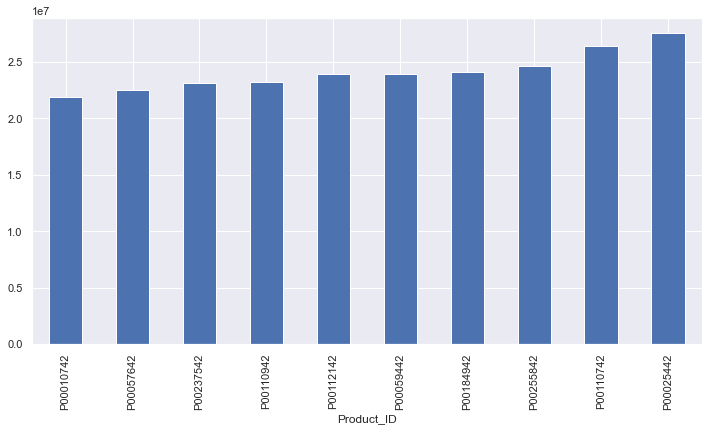

In [76]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:ylabel='Purchase'>

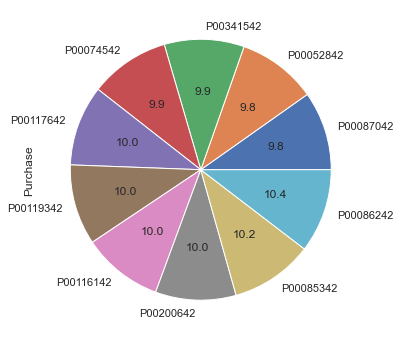

In [81]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:xlabel='Product_Category_1'>

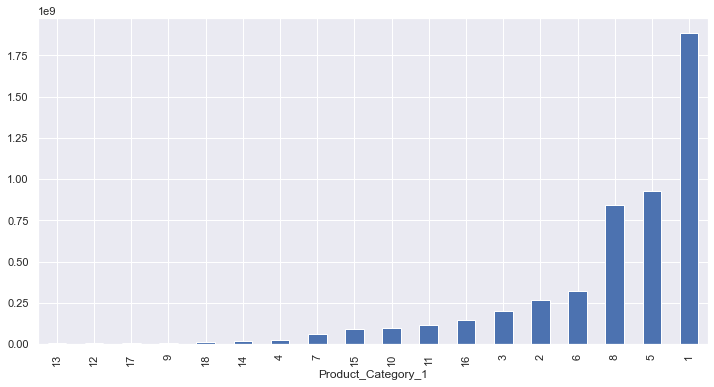

In [88]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

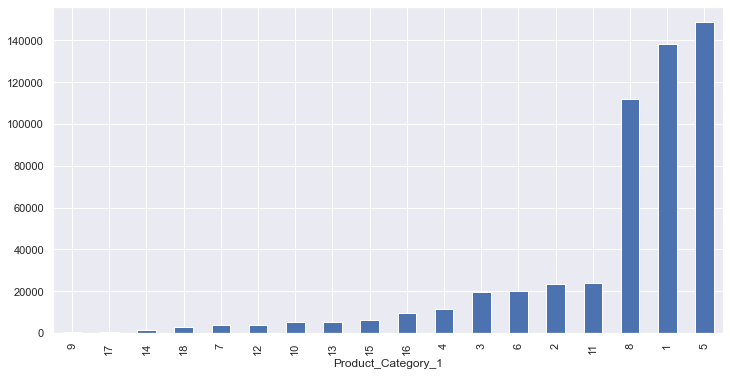

In [89]:
df.groupby("Product_Category_1").size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

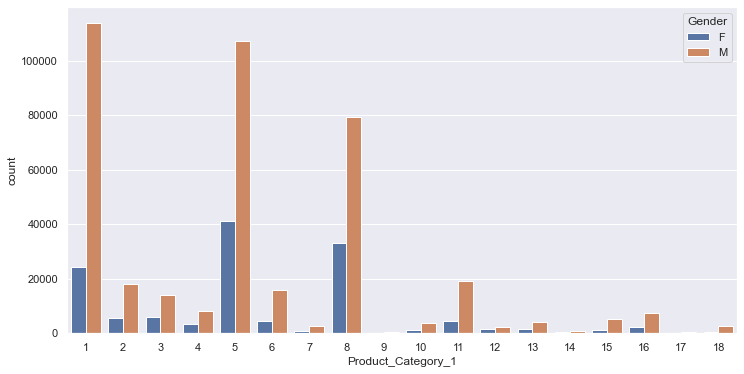

In [91]:
sns.countplot(x = 'Product_Category_1', hue = "Gender", data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

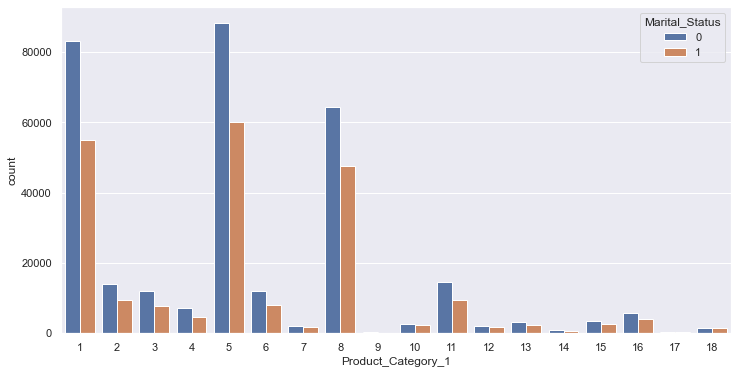

In [92]:
sns.countplot(x = 'Product_Category_1', hue = "Marital_Status", data = df)

# Combining Age and Marital Status

In [95]:
Gender_Marital_Status = []
for i in range(len(df)):
    Gender_Marital_Status.append(df["Gender"][i] + "_" + str(df["Marital_Status"][i]))

In [97]:
df['MaritalGender'] = Gender_Marital_Status

In [98]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

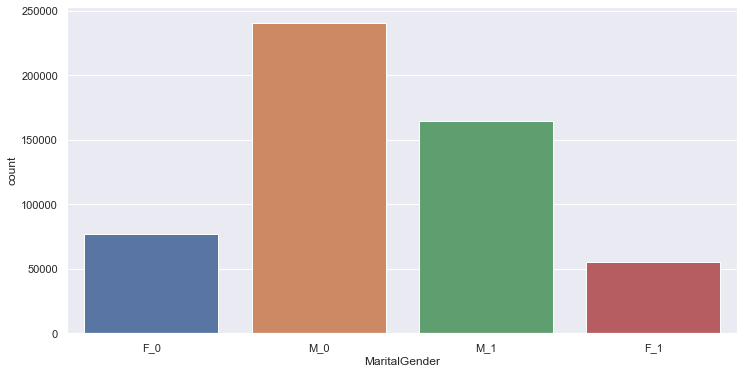

In [99]:
sns.countplot(x = df['MaritalGender'])

<AxesSubplot:xlabel='MaritalGender'>

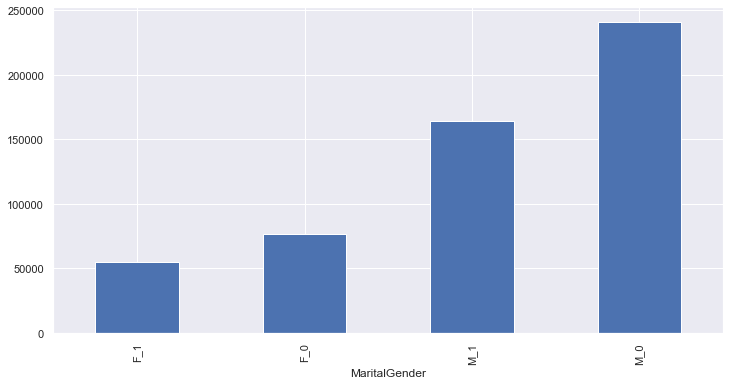

In [112]:
df.groupby('MaritalGender').count()["Purchase"].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='MaritalGender'>

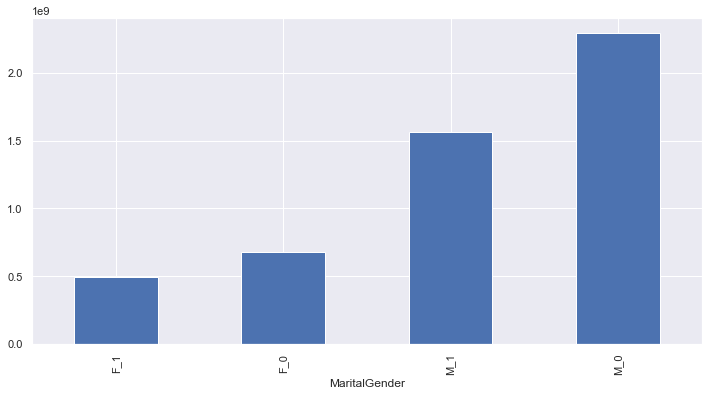

In [111]:
df.groupby('MaritalGender').sum()["Purchase"].sort_values().plot(kind = 'bar')

<AxesSubplot:ylabel='Purchase'>

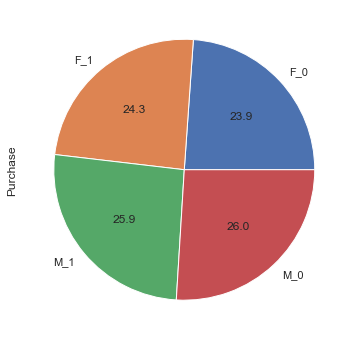

In [115]:
df.groupby('MaritalGender').mean()["Purchase"].sort_values().plot(kind = 'pie', autopct = '%.1f')

<AxesSubplot:xlabel='Age', ylabel='count'>

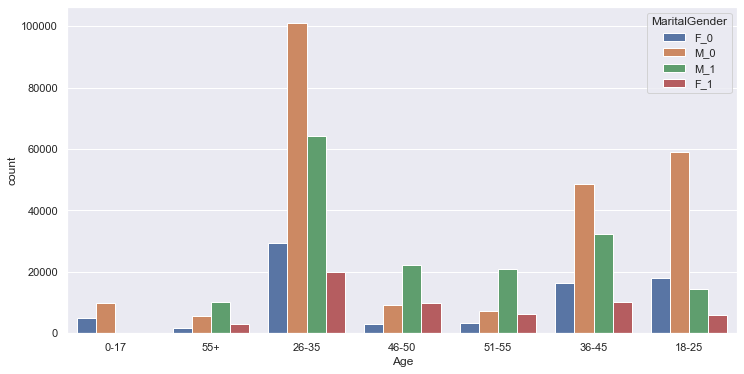

In [100]:
sns.countplot(x = 'Age', hue = "MaritalGender", data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

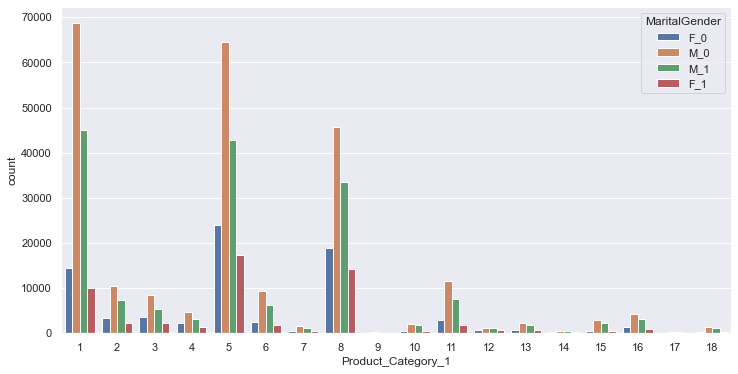

In [101]:
sns.countplot(x = 'Product_Category_1', hue = "MaritalGender", data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

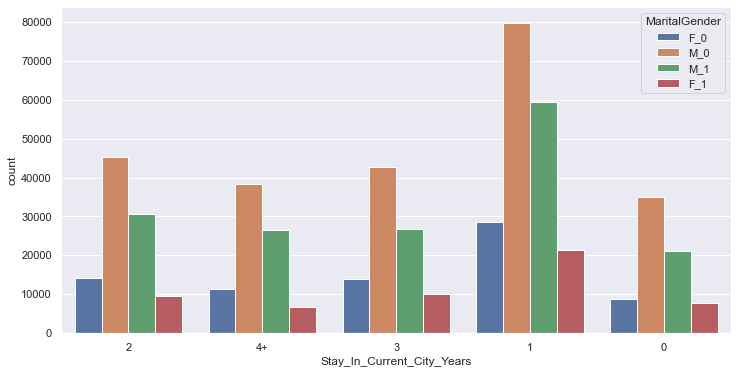

In [103]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = "MaritalGender", data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

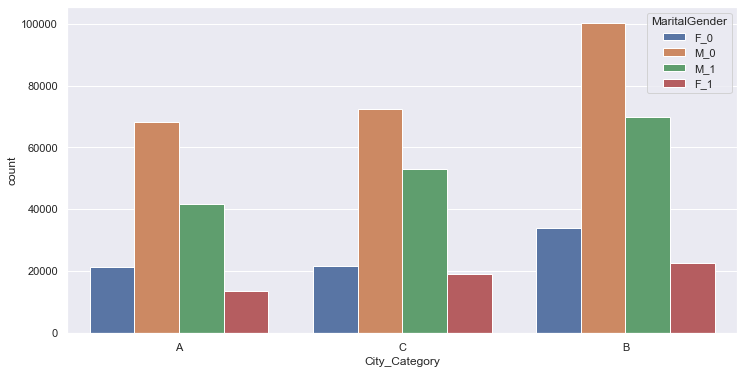

In [107]:
sns.countplot(x = 'City_Category',hue = "MaritalGender", data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

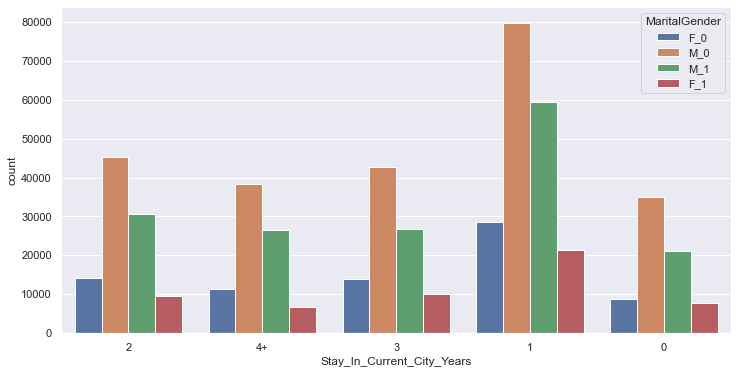

In [108]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = "MaritalGender", data = df)